# Linear Regression

In this lab we will move away from classification into regression.  In linear regression, we try to predict a numerical value rather than a class.  We first look at how linear regression is formulated and how to solve it exactly and numerically.  The numerical approach we use is Gradient Descent, which is a fundamental method you have seen in the topic on perceptron. We then look at using *sklearn* for Linear Regression, and finally we will also look at two common regularization techniques Ridge and Lasso regressions

#### Elements of a Machine Learning Model

Before diving into linear regression proper, lets first have an overview of what makes up a ML model.  In most ML models, from linear regression to neural networks, you will almost always see the following elements 

- **Model Parameters** - also known as weights.  These values give the functional form of a model a concrete, specified model.  The objective of ML is to essentially estimate these parameters from training data
- **Loss Function** - also cost function. Allows you to quantify the difference between prediction and ground truth.  You want this to be small. Examples, squared loss
- **Optimisation** - find the parameters that minimize loss.  Can be exact for differentible functions, most of the time numerical e.g. gradient descent 
- **Regularization** - introduce penalty term to control complexity of models.  Achieved through modifying the loss function 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# boston = datasets.load_boston()

from sklearn.datasets import fetch_openml 
boston1 = fetch_openml(data_id=531)

In [2]:
boston1.keys()
#Dictionary that stores the data, target, feature names etc. You don't need to track these manually. Can consider doing something similar for your own dataset 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
boston1.data.head()
boston1.frame.head() #Gives the data and target in the same data frame, medv is the target variable

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston1.target[:10].head() #Gives the first 10 rows of target variable 

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [5]:
boston1.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

#### Linear Regression Formulation

Linear regression assumes that the *target* variable is continuous and linear in the *predictors*.  For example, if you want to predict the average housing price in a neighbourhood, you might hypothesize that it is linear in the average number of rooms.  That means,

$$
y = wx + b 
$$

where $y$ represents the average price, $x$ represents the average number of rooms, $w$ is the coeffient, $b$ is the bias.  We can also interprest $w$ as the marginal price increase for an additional room.  The scatter plot would look something like this

In [6]:
boston = boston1 # creating copy of original, good practice 

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

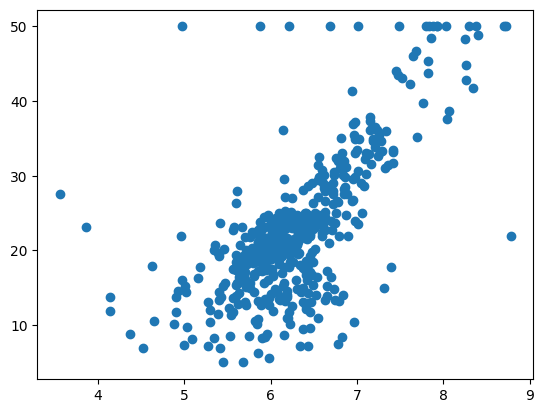

In [7]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target
print(boston.DESCR) # Gives you description of dataset and variable documentation 
plt.scatter(X.RM, y)
plt.show()

We have many $M$ data points $\{(x_1, y_1) , (x_2, y_2) ,..., (x_M, y_M)\}$.  How do we use these data points to estimate the the values of $w$ and $b$? <br>
The idea is that we first hypothesize what the relation should look like.  In this case we have $h(x)=w_1 x + w_0$ <br>
We then need to define a cost function $J$ between hypothesized values and actual values.  In the case of linear regression, we define the *mean squared error* to be the cost function

$$
J(w_1,w_0) = \frac{1}{M} \sum_{i=1}^{M} [h(x_i) - y_i]^2
$$

Finally we find the values of $w_1$, $w_0$ which minimizes $J$

#### Exact Method: Normal Equation

In general however we could be dealing with $N$ features.  In that case our hypothesis takes the following form

$$
h(\vec{x}) = \vec{w}^\top  \vec{x} = w_0 x_0 + w_1 x_1 + ... w_N x_N
$$

And if we collect $M$ data points, and each data point contains $N$ features, the training dataset $X$ would be a matrix of dimension $m \times (n+1)$.  The cost function becomes

$$
J(\vec{w}) = \frac{1}{M} (\textbf{X}\vec{w} - \vec{y}) ^\top (\textbf{X} \vec{w}-\vec{y})
$$

Without going into details the exact solution is given by the formula below

$$
\vec{w} = ( \textbf{X}^\top \textbf{X} )^{-1} \textbf{X}^\top \vec{y}  \tag{1}
$$

In [8]:
# ^ computationally expensive/invasive
# so use numerical methods instead

Lets concretely look at one example.  First load the Boston housing dataset from sklearn.  In this dataset, we are given $13$ features and target variable being the median housing price

In [9]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target


After some basic exploration, we notice that the variable RM, LSTAT seem to correlate to the target variable.  See the plots below

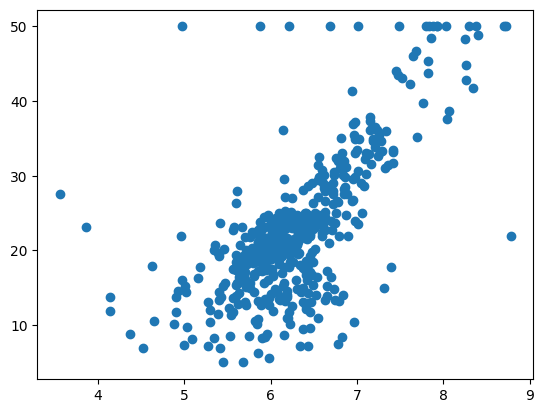

In [10]:
plt.scatter(X.RM, y)
plt.show()

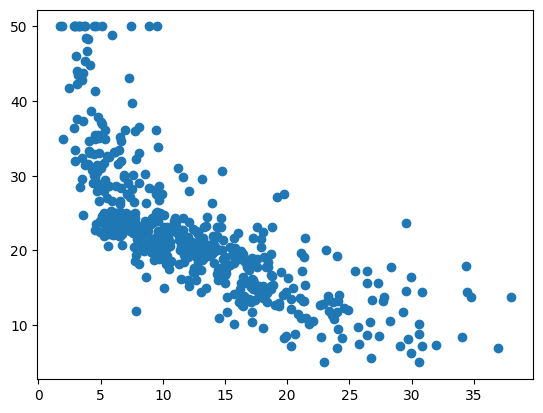

In [11]:
plt.scatter(X.LSTAT, y)
plt.show()

Hence, lets try to focus on building a simple model assuming the following form

$$
price = w_0 + w_1 \times RM + w_2 \times LSTAT
$$

Recall the formula above to solve $\vec{w}$, what we need is the training matrix $\textbf{X}$ and the target values $\vec{y}$ <br>

Note that $\textbf{X}$ consists of $M$ rows of training data, and each column represent values for each feature.  The first column is set to $1$ corresponding to the bias term.  $\textbf{X}$ looks like the following

In [12]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target

X_features = X[["RM", "LSTAT"]].to_numpy()
ones = np.ones(len(X)) # 1s being the constant term, will end up being w0 

X = np.c_[ ones , X_features ]
X

array([[1.   , 6.575, 4.98 ],
       [1.   , 6.421, 9.14 ],
       [1.   , 7.185, 4.03 ],
       ...,
       [1.   , 6.976, 5.64 ],
       [1.   , 6.794, 6.48 ],
       [1.   , 6.03 , 7.88 ]])

Plugging in all the RHS of equation $(1)$, we can solve for $\vec{w}$ as the following

$ (X^T X)^{-1} $

$X^T y$

$w = (X^TX)^{-1} X^Ty$

In [13]:
xTx_inv = np.linalg.inv ( np.dot ( np.transpose(X) , X ) ) 
xTy = np.dot ( np.transpose(X) , y)
w1 = np.dot( xTx_inv , xTy)
print(w1)

[-1.35827281  5.09478798 -0.64235833]


#### Numerical Method: Gradient Descent

The exact method described above involve inverting a matrix of size $N \times N$, which can be an expensive operation if you have a lot of features.  An alternative approach is solve it numerically using Gradient Descent.  First find the gradient of $J$ at point $\vec{w}$.  Then at every iteration we take a small step $\alpha$ in the direction opposite to the gradient.  Concretely, we have at each step

$$
\vec{w}^+ = \vec{w} - \alpha \textbf{X}^\top ( \textbf{X} \vec{w} - \vec{y} )
$$

where $\vec{w}$ is the weight vector we want to find, $\textbf{X}$ is the matrix containing all training data, $\vec{y}$ is the training target variable

In [14]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X = X[["RM", "LSTAT"]].to_numpy()
X = np.c_[ np.ones(len(X)) , X_features ]

y = boston.target.to_numpy() # marked by lei
y = y.reshape(len(y),1)


epsilon = 10e-6

alpha = 10e-6
w = np.zeros((3,1))

for i in range(100000):
    old_w = w
    w = w - alpha * np.dot ( np.transpose(X) , np.dot(X,w)-y )
    if np.linalg.norm(w-old_w)<epsilon:
        print("solution found")
        print(w, w1)
        break

solution found
[[-1.02718253]
 [ 5.04896874]
 [-0.64561254]] [-1.35827281  5.09478798 -0.64235833]


#### Linear Regression: Parameter Estimation and Model Metrics

Lets now turn to using sklearn to build a Linear Regression model.  We will still use the Boston dataset as the basis

In [15]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


Categorical Variables need to be converted to a numerical format. The example listed below called label encoding, where each category is given a different integar (eg. apple =0, orange = 1). However, this can sometimes cause issues as there is now an implication of apple < orange. 

As such, an alternative method is one-hot encoding (dummy variables)

In [17]:
cat_columns = X.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,1,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,1,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


This method uses Sklearns built in onehot encoder, but the basic idea is that you create a separate column for each level of a categorical variable (eg. an apple column, an orange column, and a lemon column). Instead of a single fruits column that is labelled 1,2 or 3 with normal label encoding, one-hot encoding has 3 separate fruit columns, which are either 1 or 0.

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output= False)
one_hot_encoded = encoder.fit_transform(X[cat_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_columns))
X_encoded = pd.concat([X, one_hot_df], axis=1)
X_encoded = X_encoded.drop(cat_columns, axis=1)
X.head()
#one_hot_encoded
#one_hot_df
X_encoded.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_1,RAD_0,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

We can look at the model parameters

In [20]:
print("Coefficients:\n", lr.coef_)

Coefficients:
 [-7.92731013e-02  2.44258217e-02 -1.09045574e-02  3.10872419e+00
 -1.56081766e+01  4.72947355e+00 -9.94621927e-03 -1.44122605e+00
  8.52460263e-02  1.12083057e-03 -7.98975290e-01  1.15710118e-02
 -4.95680185e-01]


In [21]:
print("Intercept:\n", lr.intercept_)

Intercept:
 23.59656251432169


We can calculate $R^2$, the coefficient of determination, to quantify how much of the variation in the data is explained by the model

In [22]:
print(lr.score(X_train, y_train))

0.7435072667605974


####  Exercise 1: Does the magnitude of coefficient represent feature importance?

Explain if the magnitude of coefficients is a good representation of feature importance, with examples to show why or why not. You may illustrate using the Boston dataset above

In [23]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target

lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

Suppose I change the scale of the values for X.CRIM by dividing by 10000, then the coefficient would increase *roughly* by the same order of magnitude, as shown below

In [24]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target

X.CRIM = X.CRIM/10000

lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.coef_

array([-1.08011358e+03,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

#### Exercise 2: Best Fit Round

You are given a list of coordinates and told that a best fit line would be one that passes through the origin.  Find the equation of the best fit. <br>
Concretely, given $(x_i, y_i)$, find the value of $a$ which minimizes $\sum(y_i-ax_i)^2$.  
Please use sklearn *LinearRegression* to solve this exercise

In [25]:
# with intercept
X = np.array([2,3,4]).reshape(3,1)
y = [7,10,11]
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_, lr.intercept_)

[2.] 3.3333333333333366


In [26]:
# without intercept
X = np.array([2,3,4]).reshape(3,1)
y = [7,10,11]
lr = LinearRegression(fit_intercept=False)
lr.fit(X,y)
print(lr.coef_, lr.intercept_)

[3.03448276] 0.0


#### Regularization: Ridge Regression

In order to generalize well to unseen data, we need to ensure that we do not overfit our model to the dataset.  In other words, our model should be *learning* rather than *memorizing* the data.  As a general rule, we  favour a simpler model over a more complex one.  How then do we quantify the complexity of a model?   

The Ridge Regression proposes to minimize the following modified loss function

$$
J(\vec{w}) = \Vert \textbf{X} \vec{w} - \vec{y} \Vert^2_2 + \alpha \Vert \vec{w} \Vert^2_2 
$$

In other words, Ridge Regression introduces an additional term which penalizes coefficients with large magnitude.  In doing so, the model would then *adjust* the coefficients so as to give a lower value for less important features.

Here, using the same Boston dataset, we demonstrate the effect the of varying the $\alpha$.

In [27]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
#X = X[["RM","LSTAT"]]
y = boston.target

One point to note is that before fitting, we need to make sure that the values are in the same scale.  The reason is that if the $\textbf{X}$ values are not in the same scale then the $w$ won't be in the same scale.  The penalization on the coefficients then would not be fair 

In [28]:
from sklearn import preprocessing
X = preprocessing.scale(X)

Next we split the dataset into training and validation

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Lets iterate over the different values of $\alpha$, and capture the coefficients corresponding to each feature

In [30]:
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_squared_error

n_features = 13
n_alpha = 200

beta=np.zeros((n_features,n_alpha))
score=np.zeros((n_alpha, 1))

for alpha in range(n_alpha):
    ridge = Ridge(alpha=alpha) # trying out different values of alpha
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    #score[alpha] = mean_squared_error(y_test, y_pred)
    for i in range(13):
        beta[i][alpha] = ridge.coef_[i]

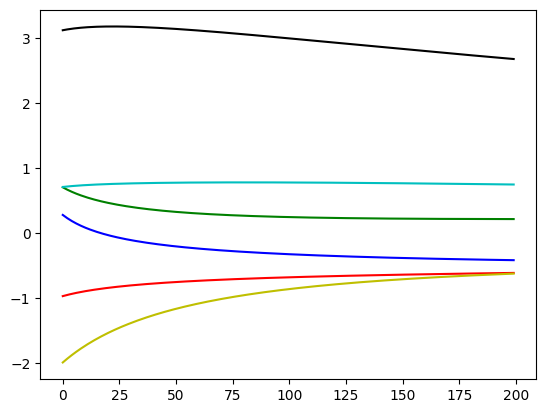

In [31]:
i = 0
plt.plot(beta[i+0], 'r', beta[i+1], 'g', beta[i+2], 'b', beta[i+3], 'c', beta[i+4], 'y', beta[i+5], 'k')
plt.show()

Along the x-axis, we have increasing $\alpha$ indicating that we are biasing the model, hence reducing the model complexity.  However, despite that, the coefficient associated with feature 5 (the black line) does not reduce in magnitude. This means that is  feature 5 is an important feature

In [32]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X = X[["RM","LSTAT"]]
y = boston.target

X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

n_features = 13
n_alpha = 200

beta=np.zeros((n_features,n_alpha))
score=np.zeros((n_alpha, 1))

for alpha in range(n_alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    score[alpha] = mean_squared_error(y_test, y_pred)

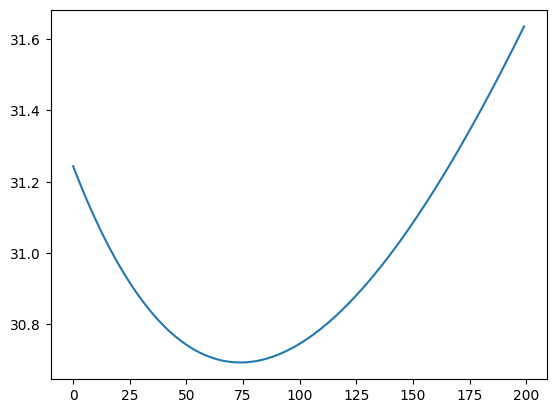

In [33]:
plt.plot(score)
# overfitting -> underfitting

Here we select only two features, and run different values to find the best $\alpha$ which minimizes min squared errors